In [1]:
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import AuthorTopicModel
from gensim.test.utils import datapath

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# load data
dictionary = Dictionary.load("data/dictionary.pkl")
temp_file = open("data/train.pkl", "rb")
train = pickle.load(temp_file)
train.reset_index(drop=True, inplace=True)
temp_file.close()
train_reviews = train["tokens"].tolist()
temp_file = open("data/test.pkl", "rb")
test = pickle.load(temp_file)
temp_file.close()
train_corpus = MmCorpus("data/train_corpus.mm")
test_corpus = MmCorpus("data/test_corpus.mm")

### Author Topic

In [3]:
# load best model (10 topics)
lda = AuthorTopicModel.load(datapath("author_10"))

In [4]:
# learned topic proportion prior
lda.alpha

array([0.0285606 , 0.19291188, 0.0038508 , 2.16548268, 0.00384733,
       0.00384735, 0.00384968, 0.17555756, 0.0038491 , 0.00495719])

In [5]:
lda.get_author_topics("fantasy",minimum_probability=.01)

[(3, 0.8581101453449446), (7, 0.13990704444132115)]

In [6]:
lda.get_author_topics("history",minimum_probability=.01)

[(0, 0.04731197800496906), (3, 0.9500823020841711)]

In [7]:
lda.get_author_topics("mystery",minimum_probability=.01)

[(3, 0.695853376954617), (7, 0.3038303109538491)]

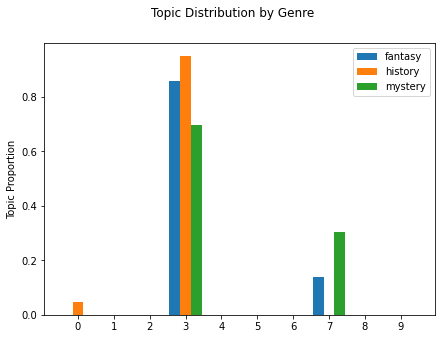

In [8]:
fig, ax = plt.subplots(figsize=(7,5))
width = 0.3
fig.suptitle("Topic Distribution by Genre")
ax.bar(np.arange(10)-width,[0,0,0,0.858,0,0,0,0.1399,0,0],width,label="fantasy")
ax.bar(np.arange(10),[0.0473,0,0,0.95,0,0,0,0,0,0],width,label="history")
ax.bar(np.arange(10)+width,[0,0,0,0.696,0,0,0,0.3038,0,0],width,label="mystery")
ax.set_xticks(np.arange(10))
ax.set_ylabel("Topic Proportion")
plt.legend()
plt.show()

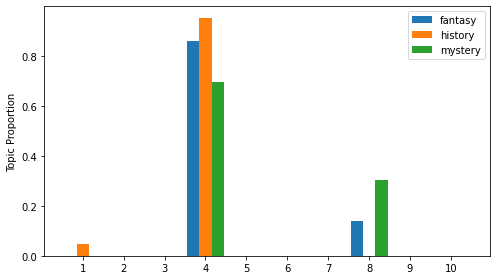

In [9]:
fig, ax = plt.subplots(figsize=(7,4))
width = 0.3
ax.bar(np.arange(10)-width,[0,0,0,0.858,0,0,0,0.1399,0,0],width,label="fantasy")
ax.bar(np.arange(10),[0.0473,0,0,0.95,0,0,0,0,0,0],width,label="history")
ax.bar(np.arange(10)+width,[0,0,0,0.696,0,0,0,0.3038,0,0],width,label="mystery")
ax.set_ylabel("Topic Proportion")
plt.xticks(np.arange(10),labels=np.arange(10)+1)
plt.legend()
plt.tight_layout()
plt.savefig("Author_topicbygenre.png")

In [10]:
pprint(lda.print_topics())

[(0,
  '0.079*"history" + 0.074*"war" + 0.052*"historical" + 0.032*"american" + '
  '0.029*"life" + 0.020*"period" + 0.016*"account" + 0.016*"german" + '
  '0.016*"state" + 0.015*"year"'),
 (1,
  '0.009*"dex" + 0.005*"lamora" + 0.005*"wraith" + 0.005*"continuity" + '
  '0.004*"sentimental" + 0.004*"rune" + 0.004*"temeraire" + 0.004*"flora" + '
  '0.004*"aedion" + 0.004*"jaime"'),
 (2,
  '0.000*"like" + 0.000*"even" + 0.000*"character" + 0.000*"good" + '
  '0.000*"time" + 0.000*"people" + 0.000*"get" + 0.000*"would" + 0.000*"also" '
  '+ 0.000*"series"'),
 (3,
  '0.008*"character" + 0.008*"like" + 0.007*"really" + 0.006*"time" + '
  '0.006*"love" + 0.006*"would" + 0.005*"much" + 0.005*"first" + 0.004*"get" + '
  '0.004*"life"'),
 (4,
  '0.000*"bond" + 0.000*"realize" + 0.000*"stephanie" + 0.000*"character" + '
  '0.000*"enjoyed" + 0.000*"dyer" + 0.000*"mara_dyer" + 0.000*"kept" + '
  '0.000*"attention" + 0.000*"writing"'),
 (5,
  '0.000*"lot" + 0.000*"people" + 0.000*"thinking" + 0.000*